# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Scikit-Data-Widget-Introduction" data-toc-modified-id="Scikit-Data-Widget-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scikit-Data Widget Introduction</a></div><div class="lev2 toc-item"><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Preparation</a></div><div class="lev3 toc-item"><a href="#Variables-description:" data-toc-modified-id="Variables-description:-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Variables description:</a></div><div class="lev3 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev2 toc-item"><a href="#Widget" data-toc-modified-id="Widget-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Widget</a></div><div class="lev2 toc-item"><a href="#Predictions" data-toc-modified-id="Predictions-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predictions</a></div><div class="lev3 toc-item"><a href="#Prepare-data" data-toc-modified-id="Prepare-data-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Prepare data</a></div><div class="lev3 toc-item"><a href="#Classification" data-toc-modified-id="Classification-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Classification</a></div><div class="lev3 toc-item"><a href="#Regression" data-toc-modified-id="Regression-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Regression</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Conclusion</a></div>

# Scikit-Data Widget Introduction

Scikit-Data library offers a set of functionalities to help
the Data Analysts in their work.

Initially is just a small set of simple functionalities like convert a dataframe
in a crostab dataframe using some specifics fields.

Other interesting functionality is offer a jupyter widget to offer interactive 
options to handle the data with graphical and tabular outputs.

To import the Scikit-Data Jupyter Widget just use the following code:

```python
from skdata.widgets import SkDataWidget
```

In [1]:
try:
    from skdata.widgets import SkDataWidget
    from skdata import SkData
except:
    # development version
    import sys
    import os

    sys.path.insert(0, os.path.abspath('../'))
    from skdata.widgets import SkDataWidget
    from skdata import SkData
    
#from sklearn import datasets
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

## Data Preparation

The data used in this example was extracted from Kaggle Titanic challenge.

### Variables description:

* survival        Survival            (0 = No; 1 = Yes)
* pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name            Name
* sex             Sex
* age             Age
* sibsp           Number of Siblings/Spouses Aboard
* parch           Number of Parents/Children Aboard
* ticket          Ticket Number
* fare            Passenger Fare
* cabin           Cabin
* embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations."

With *SkDataWidget* class, you can read a *pandas.DataFrame* or read a csv
from specific file path:

```python
w = SkDataWidget(
    SkData(
        file_path='file_path', 
        index_col='index_col', 
        target_col='target_col'
    )
)
```

or 

```python
w = SkDataWidget(
    SkData(
        pd.read_csv('file_path', index_col='index_col'), 
        target_col='target_col'
    )
)
```


summary method can be used to return some interesting information from the data:

```python
w.summary()
```

In [2]:
w = SkDataWidget(
    SkData(file_path='../data/train.csv', index_col='PassengerId')
)

w().summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,int64,"[0, 1]",2,891,0
Pclass,int64,"[1, 2, 3]",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,object,"['female', 'male']",2,891,0
Age,float64,"[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, ...",88,714,177
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Cabin,object,"['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A2...",147,204,687


If you execute the call method of the object, it will return the data in pandas data frame format.

```python
w().data.head()
```

This is the same as:

```python
w.skd.data.head()
```

In [3]:
w().data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If you want to replace some values in categorical data just use pandas format:

```python
sdkw().data.column_name.replace({old_key: new_key}, inplace=True)
```

PS: this should be applied before categorize method.

In [4]:
w().data.Sex.replace({'male': 'Male', 'female': 'Female'}, inplace=True)
w().data.Embarked.replace({
    'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'
}, inplace=True)

w().summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,int64,"[0, 1]",2,891,0
Pclass,int64,"[1, 2, 3]",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,object,"['Female', 'Male']",2,891,0
Age,float64,"[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, ...",88,714,177
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Cabin,object,"['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A2...",147,204,687


### Data cleaning

If you need to convert some feature to categorical type, you can use 
categorize method with a column name and a categories dictionary with 
code and label values, such as:

```python
w.skd.categorize(
    col_name='field_name1',
    categories={'id1': 'label1', 'id2': 'label2'},
)
```

or, if you don't want to specify a pair id and label, just omit the 
**categories** parameter.


You also can apply categorization on all object columns that have total unique 
values less or equal than a max categories identified, such as:

```python
w.skd.categorize(max_categories=0.1)
```

This means that all columns with type object that have a total unique values
less than 10% of the total of values will be converted in category type.

In [5]:
survived_dict = {0: 'Died', 1: 'Survived'}
pclass_dict = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}

w().categorize('Survived', survived_dict)
w().categorize('Pclass', pclass_dict)
w().categorize('Sex')
w().categorize('Embarked')

w().summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,891,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,category,"['Female', 'Male']",2,891,0
Age,float64,"[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, ...",88,714,177
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Cabin,object,"['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A2...",147,204,687


In some cases, NaN (not a number) values in the dataset can throw an 
exception error.

To avoid this exception some methods can be used.

1. Drop all columns that have a total NaN values more than a threshold:

```python
w.skd.drop_columns(max_na_values=0.1)
```

The code above means all columns with a total NaN values more than 10% 
will be removed.

In [6]:
w().drop_columns(max_na_values=0.1)
w().summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,891,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,category,"['Female', 'Male']",2,891,0
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Embarked,category,"['Cherbourg', 'Queenstown', 'Southampton']",3,889,2


If you want to drop all remain records that have a NaN data, just use 
pandas dropna method:

```python
skdw().data.dropna(inplace=True)
```

In [7]:
w().data.dropna(inplace=True)
w().summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,889,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,889,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",889,889,0
Sex,category,"['Female', 'Male']",2,889,0
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,889,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,889,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",680,889,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",247,889,0
Embarked,category,"['Cherbourg', 'Queenstown', 'Southampton']",3,889,0


Sometimes, columns as object and categorical type with a lot of unique values
doesn't explain much about your data. In this case, you can remove these 
columns when the total all unique values exceed an threshold:

```python
w().drop_columns(max_unique_values=0.3)
```

In [8]:
w().drop_columns(max_unique_values=0.3)
w().summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,889,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,889,0
Sex,category,"['Female', 'Male']",2,889,0
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,889,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,889,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",247,889,0
Embarked,category,"['Cherbourg', 'Queenstown', 'Southampton']",3,889,0


## Widget

You can use the show_chart method to change some parameters of the chart that 
show information of a cross tab of the fields selected:
    
```python
w.show_chart(
    field_reference='field_of_reference',
    fields_comparison=['field1']
)
```

This method will use the parameters informed and create and show a chart and 
a data table.

<IPython.core.display.Javascript object>


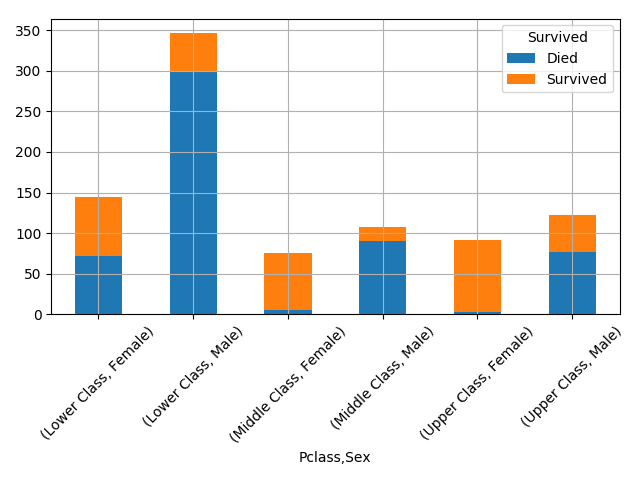

Survived,Died,Survived
Pclass,,
Lower Class,372,119
Middle Class,97,87
Upper Class,80,134


Survived,Died,Survived
Sex,,
Female,81,231
Male,468,109


Survived             Died  Survived
Pclass       Sex                   
Lower Class  Female    72        72
             Male     300        47
Middle Class Female     6        70
             Male      91        17
Upper Class  Female     3        89
             Male      77        45

In [9]:
%matplotlib notebook

w.show_chart()

## Predictions

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score

### Prepare data

In [ ]:
train = daw.data.copy()

train.Sex.replace('Male', 1, inplace=True)
train.Sex.replace('Female', 2, inplace=True)
train.Embarked.replace('Cherbourg', 1, inplace=True)
train.Embarked.replace('Queenstown', 2, inplace=True)
train.Embarked.replace('Southampton', 3, inplace=True)
train.Pclass.replace('Upper Class', 1, inplace=True)
train.Pclass.replace('Middle Class', 2, inplace=True)
train.Pclass.replace('Lower Class', 3, inplace=True)
train.Survived.replace('Died', 0, inplace=True)
train.Survived.replace('Survived', 1, inplace=True)

y_train = train['Survived'].copy()

print('train:')
display(train.head())

print('y_train:')
display(y_train.head())

test = pd.read_csv('../data/test.csv')
y_test =  pd.read_csv('../data/genderclassmodel.csv', index_col='PassengerId')


k = [train.index.name] + train.keys().tolist()
k.pop(k.index('Survived'))

test = test[k]

test.replace('male', 1, inplace=True)
test.replace('female', 2, inplace=True)
test.replace('C', 1, inplace=True)
test.replace('Q', 2, inplace=True)
test.replace('S', 3, inplace=True)

train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

print('test:')
display(test.head())

print('y_test:')
display(y_test.head())

# assert if the order of passenger is the same in test and y_test
assert np.all(test.PassengerId == y_test.index)

In [ ]:
from itertools import combinations

k = list(train.keys())
k.pop(k.index('Survived')) if 'Survived' in k else None

list_features = []

for i in range(len(k)-1):
    list_features += list([list(c) for c in combinations(k, i+1)])
list(list_features)

### Classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [ ]:
predicted = test[['PassengerId']].copy()

results = []
best = {'features': None, 'score': 0}

for model in classifiers:
    model_name = type(model).__name__

    print('\n')
    print('=' * 80)
    print(model_name)
    print('=' * 80)
    
    for features in list_features:
        result = {
            'model_name': model_name,
            'features': features
        }
        
        _train = train[features].fillna(0)
        _test = test[features].fillna(0)
        
        model.fit(_train, y_train)

        predicted['Survived'] = model.predict(_test)
        result['predicted'] = predicted.copy()
        
        result['f1'] = f1_score(y_test, predicted['Survived'])
        result['precision'] = precision_score(y_test, predicted['Survived'])
        result['accuracy'] = accuracy_score(y_test, predicted['Survived'])
        
        score = (
            result['f1'] + result['precision'] + result['accuracy']
        ) / 3
        
        if score > best['score']:
            best['model_name'] = model_name
            best['score'] = score
            best['features'] = features
        
        results.append(result)

        print('\n')
        print('features:       ', result['features'])
        print('f1 score:       ', result['f1'])
        print('precision score:', result['precision'])
        print('accuracy score: ', result['accuracy'])

print('\n')
print('BEST RESULT')
print('features:', best['features'])
print('score:   ', best['score'])

In [ ]:
best_result = [
    r for r in results if
    r['features'] == best['features'] and
    r['model_name'] == best['model_name']
][0]

best_result['predicted'].to_csv(
    '/tmp/titanic-%s.csv' % best_result['model_name'], 
    index=False
)

best_result

### Regression

## Conclusion

These are an initial functionalities to help handle and observe data phenomenons
in a very quick way.